In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import warnings
warnings.filterwarnings('ignore')

In [455]:
# Load the data
df = pd.read_excel(r"input_data\Final_HB_featureData.xlsx")


df.drop(columns= ["File Name",'style'],inplace =True)

# Display basic info

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (64, 119)

First few rows:


,bag_height,bag_width,top_opening_width,gusset_width,handle_drop_length,long_strap_drop_length,logo_size,material_type_x,opener_design,opener_material,...,article_type,factory_store_type,brandcode,fiscalyear,net_sales_qty_sum,net_sales_amt_lcl_sum,qtr_highest_sale_qty,qtr_highest_sale_amt,store_highest_sale,max_qty_sold_at_store
0,17.5,23.5,23.5,8.5,0.0,25.5,0.0,Leather,Flap,Leather,...,ZFG,factoryExclusive,COH,2025,78207,11625866.71,2,2,ECCHECFA,31013
1,13.5,24.0,24.0,5.7,0.0,24.5,2.0,Smooth Leather,Flap,Leather,...,ZFG,factoryExclusive,COH,2025,36254,5253843.02,2,2,ECCHECFA,13234
2,11.5,25.8,25.8,9.0,23.0,23.0,3.0,Leather,Zipper,Metal,...,ZFG,factoryExclusive,COH,2025,77,8053.09,1,1,3808,21
3,7.7,11.8,11.8,0.0,0.0,0.0,1.0,Crossgrain Leather,Zipper,Metal,...,ZFG,factoryExclusive,COH,2025,0,33.03,1,1,3802,1
4,30.0,45.0,45.0,15.0,25.5,0.0,0.0,Canvas,Zipper,Nylon,...,ZFG,factoryExclusive,COH,2025,-1,-158.00,1,1,ECCHECFA,-1


In [456]:
sales_cols = [ 'net_sales_amt_lcl_sum', 'max_qty_sold_at_store','qtr_highest_sale_qty',	'qtr_highest_sale_amt']
df.drop(columns = sales_cols,inplace=True)

In [457]:
# df["signature_pattern"].value_counts()

In [458]:
df["hangtag_presence"].value_counts()

hangtag_presence
1    44
0    20
Name: count, dtype: int64

In [459]:
cols_to_remove = ['article_type','factory_store_type','store_highest_sale','brandcode','fiscalyear' ,'signature_pattern']
df.drop(columns = cols_to_remove, inplace=True)

In [460]:

print(df.dtypes)
print(df)

bag_height            float64
bag_width             float64
top_opening_width     float64
gusset_width          float64
handle_drop_length    float64
                       ...   
style_group            object
active                   bool
size_code              object
color_count             int64
net_sales_qty_sum       int64
Length: 109, dtype: object
    bag_height  bag_width  top_opening_width  gusset_width  \
0         17.5       23.5               23.5           8.5   
1         13.5       24.0               24.0           5.7   
2         11.5       25.8               25.8           9.0   
3          7.7       11.8               11.8           0.0   
4         30.0       45.0               45.0          15.0   
..         ...        ...                ...           ...   
59        13.0       23.5               23.5           4.3   
60        12.5       18.6               18.6           7.0   
61        13.1       19.3               19.3           5.5   
62         9.7       16

In [461]:
# pd.to_numeric(df['bag_height'])

In [462]:
# Function to check data values and update the datatype of the columns
def update_column_datatypes(df):
    for column in df.columns:
        try:
            # Try converting to numeric type
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            # If conversion fails, keep as object type
            df[column] = df[column].astype(str)
    return df

# Update datatypes of the columns
df_updated = update_column_datatypes(df)

print(df_updated.dtypes)
print(df_updated)

bag_height            float64
bag_width             float64
top_opening_width     float64
gusset_width          float64
handle_drop_length    float64
                       ...   
style_group            object
active                   bool
size_code              object
color_count             int64
net_sales_qty_sum       int64
Length: 109, dtype: object
    bag_height  bag_width  top_opening_width  gusset_width  \
0         17.5       23.5               23.5           8.5   
1         13.5       24.0               24.0           5.7   
2         11.5       25.8               25.8           9.0   
3          7.7       11.8               11.8           0.0   
4         30.0       45.0               45.0          15.0   
..         ...        ...                ...           ...   
59        13.0       23.5               23.5           4.3   
60        12.5       18.6               18.6           7.0   
61        13.1       19.3               19.3           5.5   
62         9.7       16

In [463]:
# df['handle_drop_length'].value_counts()

In [464]:
# df['long_strap_drop_length'].value_counts()

In [465]:
# # Rename columns
# df.rename(columns={'handle_drop': 'handle_drop_length', 'long_strap_drop': 'long_strap_drop_length'}, inplace=True)
# incorrect_dtype_columns = ['handle_drop_length', 'long_strap_drop_length']
# df[incorrect_dtype_columns] = df[incorrect_dtype_columns].astype(float)

In [466]:
## 3. Data Preprocessing

### 3.1 Check for Missing Values


# Check for missing values
missing_values = df.isnull().sum()
print("Features with missing values:")
print(missing_values[missing_values > 0])

Features with missing values:
handle_drop_length         4
long_strap_drop_length     3
logo_size                  1
stitching_density          1
hidden_snap               63
collaboration             64
dtype: int64


In [467]:
df["material_type_x"].value_counts()


material_type_x
Leather                                                41
leather                                                 3
Pebbled Leather                                         2
nan                                                     2
Spazzolato Leather                                      2
Crossgrain Leather                                      1
Smooth Leather                                          1
Cherry Print                                            1
Refined Pebbled Leather                                 1
Canvas                                                  1
Double Faced Leather                                    1
Pebble Leather                                          1
Signature                                               1
Bonded Leather                                          1
Leather and PVC                                         1
R                                                       1
Mixed                                                   

In [468]:
df["material_type_y"].value_counts()


material_type_y
LTH    34
nan    17
TXT    12
MIX     1
Name: count, dtype: int64

In [469]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['material_type_x',
 'opener_design',
 'opener_material',
 'leather_texture',
 'hardware_color',
 'num_of_compartments',
 'closure_type',
 'silhouette_type',
 'bag_shape',
 'color',
 'interior_lining',
 'strap_type',
 'strap_connector',
 'edge_finishing',
 'embellishment',
 'top_handle_style',
 'logo_placement',
 'logo_style',
 'logo_type',
 'finish_type',
 'style_code',
 'department_desc',
 'gender',
 'class',
 'subclass',
 'collection',
 'subcollection',
 'licensed',
 'material',
 'material_type_y',
 'silhouette',
 'style_group',
 'size_code']

In [470]:

### 3.2 Handle Missing Values


# Fill missing categorical values with 'Unknown'
# df['color'] = df['color'].fillna('Unknown')

df[categorical_features] = df[categorical_features].fillna('Unknown')

# Verify no more missing values
print("Missing categorical_features values after handling:", df[categorical_features].isnull().sum().sum())

Missing categorical_features values after handling: 0


In [471]:
# Fill missing categorical values with '0'
df = df.fillna(0)
# Verify no more missing values
print("Missing categorical_features values after handling:", df.isnull().sum().sum())

Missing categorical_features values after handling: 0


In [472]:

### 3.3 Identify and Remove Constant Features



# Identify features with only one unique value
constant_features = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_features.append(col)

print(f"Found {len(constant_features)} constant features:")
print(constant_features)

Found 25 constant features:
['limited_edition', 'colorblock_design', 'quilted_pattern', 'luggage_sleeve', 'water_bottle_pocket', 'built_in_mirror', 'dust_bag_included', 'monogram_option', 'key_leash', 'twist_lock', 'bow_element', 'floral_elements', 'animal_print', 'stripe_pattern', 'woven_elements', 'pearl_elements', 'pleat_count', 'kisslock_frame', 'collapsible_gusset', 'pen_loops', 'gender', 'article_cat_ind', 'licensed', 'collaboration', 'size_code']


In [473]:

# textual_features = [x for x in textual_features if x in df.columns]
# Convert textual feature values to uppercase
df[categorical_features] = df[categorical_features].apply(lambda x: x.str.upper() if x.dtype == 'object' else x)

In [474]:

# Remove constant features
df_clean = df.drop(columns=constant_features)
print(f"\nDataset shape after removing constant features: {df_clean.shape}")


Dataset shape after removing constant features: (64, 84)


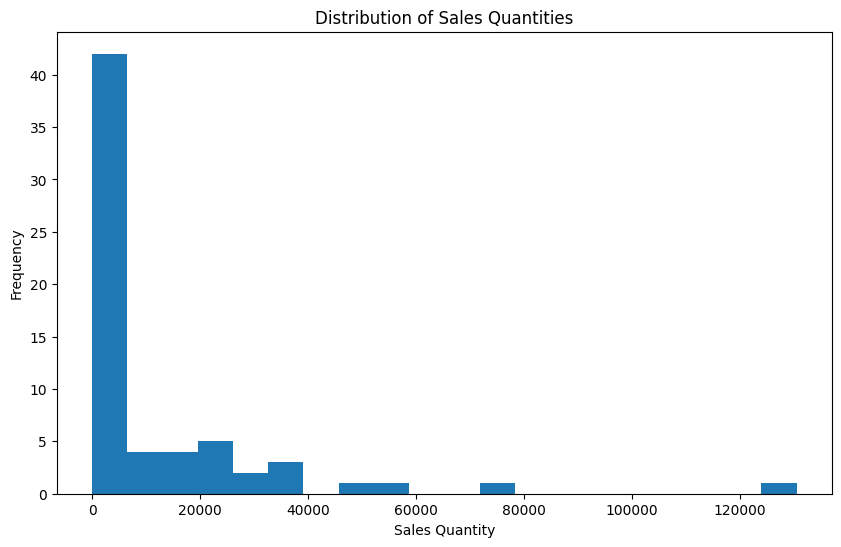

In [475]:
### 3.4 Create Sales Performance Categories

# We'll create a categorical target variable based on sales quantity to use with Naive Bayes.



# Examine the distribution of sales quantities
plt.figure(figsize=(10, 6))
plt.hist(df_clean['net_sales_qty_sum'], bins=20)
plt.title('Distribution of Sales Quantities')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.show()



In [476]:
# Create sales performance categories
sales_quantiles = df_clean['net_sales_qty_sum'].quantile([0.25, 0.5, 0.75])
print("Sales quantiles:")
print(sales_quantiles)

Sales quantiles:
0.25        0.0
0.50     1290.0
0.75    17056.5
Name: net_sales_qty_sum, dtype: float64


In [477]:


def categorize_sales(x):
    if x <= sales_quantiles[0.5]:
        return 'Low'
    # elif x <= sales_quantiles[0.5]:
    #     return 'Medium'
    # # elif x <= sales_quantiles[0.75]:
    # #     return 'Medium-High'
    else:
        return 'High'
    

df_clean['sales_category'] = df_clean['net_sales_qty_sum'].apply(categorize_sales)
print("\nSales category distribution:")
print(df_clean['sales_category'].value_counts())  
  


Sales category distribution:
sales_category
High    32
Low     32
Name: count, dtype: int64


In [478]:
### 3.5 Feature Selection

# select a subset of potentially important features for our analysis:



# Select features that are likely to influence sales
selected_features = [
    "bag_height",
    "bag_width",
    "top_opening_width",
    "gusset_width",
    "handle_drop_length",
    "long_strap_drop_length",
    "material_type_x",
    "material_type_y",
    "opener_design",
    "opener_material",
    "leather_texture",
    "hardware_color",
    "num_of_compartments",
    "closure_type",
    "silhouette_type",
    "bag_shape",
    "interior_lining",
    "num_of_int_pockets",
    "num_of_int_zip_pockets",
    "num_of_int_slip_pockets",
    "num_of_ext_pockets",
    "num_of_ext_zip_pockets",
    "num_of_ext_slip_pockets",
    "total_pocket_count",
    "strap_type",
    "strap_connector",
    "hardware_quality",
    "convertibility",
    "limited_edition",
    "signature_pattern",
    "colorblock_design",
    "quilted_pattern",
    "water_resistance",
    "corner_protection",
    "bottom_feet",
    "turnlock_hardware",
    "removable_strap",
    "adjustable_strap",
    "laptop_compatibility",
    "crossbody_option",
    "shoulder_option",
    "hand_carry_option",
    "backpack_option",
    "wristlet_option",
    "wallet_function",
    "card_slot_count",
    "phone_compatibility",
    "tablet_compatibility",
    "luggage_sleeve",
    "water_bottle_pocket",
    "ease_of_access",
    "stitching_density",
    "num_of_strap_options",
    "eco_friendly_material",
    "dust_bag_included",
    "monogram_option",
    "key_leash",
    "snap_button_closure",
    "hidden_pocket",
    "logo_placement",
    "logo_style",
    "logo_type",
    "is_symmetrical",
    "twist_lock",
    "exposed_zipper",
    "is_slouchy",
    "gusseted_pocket",
    "print_pattern",
    "floral_elements",
    "animal_print",
    "stripe_pattern",
    "woven_elements",
    "pearl_elements",
    "qtr_highest_sale_qty",
    "qtr_highest_sale_amt",
    "store_highest_sale",
    "max_qty_sold_at_store"
]

# Check if all selected features exist in the dataframe
missing_cols = [col for col in selected_features if col not in df_clean.columns]
if missing_cols:
    print(f"Warning: These columns are not in the dataframe: {missing_cols}")
    selected_features = [col for col in selected_features if col in df_clean.columns]

# Create a dataframe with only the selected features and the target
df_selected = df_clean[selected_features + ['sales_category']]
print(f"Selected dataset shape: {df_selected.shape}")

Selected dataset shape: (64, 59)


In [508]:
df_selected.columns

Index(['bag_height', 'bag_width', 'top_opening_width', 'gusset_width',
       'handle_drop_length', 'long_strap_drop_length', 'material_type_x',
       'opener_design', 'opener_material', 'leather_texture', 'hardware_color',
       'num_of_compartments', 'closure_type', 'silhouette_type', 'bag_shape',
       'interior_lining', 'num_of_int_pockets', 'num_of_int_zip_pockets',
       'num_of_int_slip_pockets', 'num_of_ext_pockets',
       'num_of_ext_zip_pockets', 'num_of_ext_slip_pockets',
       'total_pocket_count', 'strap_type', 'strap_connector',
       'hardware_quality', 'convertibility', 'water_resistance',
       'corner_protection', 'bottom_feet', 'turnlock_hardware',
       'removable_strap', 'adjustable_strap', 'laptop_compatibility',
       'crossbody_option', 'shoulder_option', 'hand_carry_option',
       'backpack_option', 'wristlet_option', 'wallet_function',
       'card_slot_count', 'phone_compatibility', 'tablet_compatibility',
       'ease_of_access', 'stitching_densit

In [479]:
df_selected["bag_height"]


0     17.5
1     13.5
2     11.5
3      7.7
4     30.0
      ... 
59    13.0
60    12.5
61    13.1
62     9.7
63     9.5
Name: bag_height, Length: 64, dtype: float64

In [480]:
categorical_features = df_selected.select_dtypes(include=['object']).columns.tolist()

categorical_features

['material_type_x',
 'material_type_y',
 'opener_design',
 'opener_material',
 'leather_texture',
 'hardware_color',
 'num_of_compartments',
 'closure_type',
 'silhouette_type',
 'bag_shape',
 'interior_lining',
 'strap_type',
 'strap_connector',
 'logo_placement',
 'logo_style',
 'logo_type',
 'sales_category']

In [483]:
df_selected['material_type_x'].value_counts()

material_type_x
LEATHER                                                44
PEBBLED LEATHER                                         2
NAN                                                     2
SPAZZOLATO LEATHER                                      2
SMOOTH LEATHER                                          1
CROSSGRAIN LEATHER                                      1
REFINED PEBBLED LEATHER                                 1
DOUBLE FACED LEATHER                                    1
CHERRY PRINT                                            1
CANVAS                                                  1
SIGNATURE                                               1
PEBBLE LEATHER                                          1
LEATHER AND PVC                                         1
BONDED LEATHER                                          1
R                                                       1
MIXED                                                   1
HD NONWOVEN                                             

In [484]:
df_selected['material_type_y'].value_counts()

material_type_y
LTH    34
NAN    17
TXT    12
MIX     1
Name: count, dtype: int64

In [485]:
df_selected.drop(columns = ["material_type_y"],inplace=True)

In [486]:
df_selected

,bag_height,bag_width,top_opening_width,gusset_width,handle_drop_length,long_strap_drop_length,material_type_x,opener_design,opener_material,leather_texture,...,hidden_pocket,logo_placement,logo_style,logo_type,is_symmetrical,exposed_zipper,is_slouchy,gusseted_pocket,print_pattern,sales_category
0,17.5,23.5,23.5,8.5,0.0,25.5,LEATHER,FLAP,LEATHER,PEBBLED,...,0,CENTER,HORSE CARRIAGE,EMBOSSED,1,0,0,0,0,High
1,13.5,24.0,24.0,5.7,0.0,24.5,SMOOTH LEATHER,FLAP,LEATHER,SMOOTH,...,1,CENTER,COACH TEXT,BLIND EMBOSS,1,0,0,0,0,High
2,11.5,25.8,25.8,9.0,23.0,23.0,LEATHER,ZIPPER,METAL,PEBBLED,...,0,CENTER,HORSE CARRIAGE,METAL,1,1,1,0,0,Low
3,7.7,11.8,11.8,0.0,0.0,0.0,CROSSGRAIN LEATHER,ZIPPER,METAL,CROSSGRAIN,...,0,CENTER,HORSE CARRIAGE,METAL,1,1,0,0,0,Low
4,30.0,45.0,45.0,15.0,25.5,0.0,CANVAS,ZIPPER,NYLON,NAN,...,0,CENTER,TEXT,PRINTED,1,1,0,0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,13.0,23.5,23.5,4.3,0.0,83.6,LEATHER,ZIPPER,NAN,NAN,...,0,NAN,NAN,NAN,0,0,0,0,0,Low
60,12.5,18.6,18.6,7.0,0.0,58.5,NAN,ZIPPER,NAN,NAN,...,0,NAN,NAN,NAN,0,0,0,1,0,High
61,13.1,19.3,19.3,5.5,0.0,0.0,HD NONWOVEN,ZIPPER,METAL,NAN,...,0,TOP,HORSE CARRIAGE,EMBOSSED,0,0,0,0,0,Low
62,9.7,16.2,16.2,3.3,0.0,0.0,"MIXED (ASIAN FAILLE, KIMLON, BONDED LEATHER, N...",ZIPPER,NAN,NAN,...,0,NAN,NAN,NAN,0,1,0,0,0,Low


In [487]:
df_selected.to_excel('df_selected.xlsx',index=False)


In [488]:

### 3.6 Encode Categorical Features



# Identify categorical features
categorical_features = df_selected.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('sales_category')  # Remove target variable from the list

print(f"Number of categorical features: {len(categorical_features)}")

# Encode categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_selected[feature] = le.fit_transform(df_selected[feature])
    label_encoders[feature] = le

# Encode the target variable
target_encoder = LabelEncoder()
df_selected['sales_category'] = target_encoder.fit_transform(df_selected['sales_category'])
print("Target classes:", target_encoder.classes_)

Number of categorical features: 15
Target classes: ['High' 'Low']


In [489]:
label_encoders

{'material_type_x': LabelEncoder(),
 'opener_design': LabelEncoder(),
 'opener_material': LabelEncoder(),
 'leather_texture': LabelEncoder(),
 'hardware_color': LabelEncoder(),
 'num_of_compartments': LabelEncoder(),
 'closure_type': LabelEncoder(),
 'silhouette_type': LabelEncoder(),
 'bag_shape': LabelEncoder(),
 'interior_lining': LabelEncoder(),
 'strap_type': LabelEncoder(),
 'strap_connector': LabelEncoder(),
 'logo_placement': LabelEncoder(),
 'logo_style': LabelEncoder(),
 'logo_type': LabelEncoder()}

In [490]:
# Get mapping (original -> encoded)
label_map = {label: index for index, label in enumerate(le.classes_)}

# Print mapping
print(label_map)

{'BLIND EMBOSS': 0, 'EMBOSSED': 1, 'METAL': 2, 'NAN': 3, 'PRINTED': 4}


In [491]:

# Get mapping (original -> encoded)
label_map = {label: index for index, label in enumerate(target_encoder.classes_)}

# Print mapping
print(label_map)

{'High': 0, 'Low': 1}


In [492]:
df_selected

,bag_height,bag_width,top_opening_width,gusset_width,handle_drop_length,long_strap_drop_length,material_type_x,opener_design,opener_material,leather_texture,...,hidden_pocket,logo_placement,logo_style,logo_type,is_symmetrical,exposed_zipper,is_slouchy,gusseted_pocket,print_pattern,sales_category
0,17.5,23.5,23.5,8.5,0.0,25.5,6,1,0,4,...,0,1,8,1,1,0,0,0,0,0
1,13.5,24.0,24.0,5.7,0.0,24.5,16,1,0,5,...,1,1,5,0,1,0,0,0,0,0
2,11.5,25.8,25.8,9.0,23.0,23.0,6,6,1,4,...,0,1,8,2,1,1,1,0,0,1
3,7.7,11.8,11.8,0.0,0.0,0.0,3,6,1,1,...,0,1,8,2,1,1,0,0,0,1
4,30.0,45.0,45.0,15.0,25.5,0.0,1,6,3,2,...,0,1,11,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,13.0,23.5,23.5,4.3,0.0,83.6,6,6,2,2,...,0,5,9,3,0,0,0,0,0,1
60,12.5,18.6,18.6,7.0,0.0,58.5,10,6,2,2,...,0,5,9,3,0,0,0,1,0,0
61,13.1,19.3,19.3,5.5,0.0,0.0,5,6,1,2,...,0,6,8,1,0,0,0,0,0,1
62,9.7,16.2,16.2,3.3,0.0,0.0,9,6,2,2,...,0,5,9,3,0,1,0,0,0,1


In [493]:
df_selected.columns

Index(['bag_height', 'bag_width', 'top_opening_width', 'gusset_width',
       'handle_drop_length', 'long_strap_drop_length', 'material_type_x',
       'opener_design', 'opener_material', 'leather_texture', 'hardware_color',
       'num_of_compartments', 'closure_type', 'silhouette_type', 'bag_shape',
       'interior_lining', 'num_of_int_pockets', 'num_of_int_zip_pockets',
       'num_of_int_slip_pockets', 'num_of_ext_pockets',
       'num_of_ext_zip_pockets', 'num_of_ext_slip_pockets',
       'total_pocket_count', 'strap_type', 'strap_connector',
       'hardware_quality', 'convertibility', 'water_resistance',
       'corner_protection', 'bottom_feet', 'turnlock_hardware',
       'removable_strap', 'adjustable_strap', 'laptop_compatibility',
       'crossbody_option', 'shoulder_option', 'hand_carry_option',
       'backpack_option', 'wristlet_option', 'wallet_function',
       'card_slot_count', 'phone_compatibility', 'tablet_compatibility',
       'ease_of_access', 'stitching_densit

In [494]:
df_selected.shape

(64, 58)

In [332]:

# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt


# pca_features = ['bag_height', 'bag_width', 'gusset_width', 'material_type_x',
#        'leather_texture', 'hardware_color', 'num_of_compartments',
#        'closure_type', 'logo_visibility', 'silhouette_type', 'bag_shape',
#        'num_of_int_pockets', 'num_of_int_zip_pockets',
#        'num_of_int_slip_pockets', 'total_pocket_count', 'strap_type',
#        'edge_finishing', 'hardware_quality', 'bottom_structure', 'bottom_feet',
#        'hangtag_presence', 'removable_strap', 'adjustable_strap',
#        'opener_design', 'opener_material', 'top_opening_width',
#        'crossbody_option', 'shoulder_option', 'hand_carry_option',
#        'wristlet_option', 'wallet_function', 'phone_compatibility',
#        'ease_of_access', 'stitching_density', 'num_of_strap_options',
#        'charm_attachment_point', 'hidden_pocket', 'top_handle_style',
#        'logo_placement', 'logo_size', 'logo_style', 'logo_type',
#        'is_symmetrical', 'exposed_zipper', 'finish_type', 'department_desc',
#        'class', 'subclass', 'collection', 'subcollection', 'material',
#        'material_type_y', 'silhouette', 'style_group', 'color_count']



# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_selected[pca_features])
# len(X_scaled)

# # Perform PCA
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X_scaled)




# # Create a DataFrame with the PCA results
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# pca_df['sales_category'] = df_selected["sales_category"]


In [333]:


# # Plot the PCA results
# plt.figure(figsize=(8, 6))
# for category in pca_df['sales_category'].unique():
#     subset = pca_df[pca_df['sales_category'] == category]
#     plt.scatter(subset['PC1'], subset['PC2'], label=category)
# plt.title('PCA of Sales Data')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Sales Category')
# plt.grid(True)
# plt.show()

In [334]:
# import joblib

# # # Save the model
# # joblib.dump(gnb, 'naive_bayes_model.pkl')

# # # Save the encoders
# # joblib.dump(label_encoders, 'label_encoders.pkl')
# # joblib.dump(target_encoder, 'target_encoder.pkl')


# ### Web Application using Flask
# import os

# import os
# os.environ["PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT"] = "5.0"  # Increase timeout
# os.environ["PYDEVD_DISABLE_SLOW_RESOLVE_WARNINGS"] = "1"

# from flask import Flask, render_template, request
# import pandas as pd
# # from sklearn.externals import joblib

# app = Flask(__name__)

# # Load the model and encoders
# model = joblib.load('naive_bayes_model.pkl')
# label_encoders = joblib.load('label_encoders.pkl')
# target_encoder = joblib.load('target_encoder.pkl')
# import time
# # time.sleep(20)

# # # Load the dataframe for unique values in UI
# # df_selected = pd.read_parquet('prediction_uiData.pq')  # Replace with your actual CSV file



# @app.route('/', methods=['GET', 'POST'])
# def predict():

#     import time
#     # time.sleep(20)
#     print(df_selected.dtypes)
#     print(df_selected.columns)
#     categorical_features = df_selected.select_dtypes(include=['object']).columns.tolist()
#     if "sales_category" in categorical_features:
#         categorical_features.remove('sales_category')  # Ensure not to include the target

#     input_data = {}

#     if request.method == 'POST':
        
        
#         for feature in categorical_features:
#             value = request.form[feature]
#             # Use the label encoder
#             encoded_value = label_encoders[feature].transform([value])[0]
#             input_data[feature] = encoded_value

#         X_new = pd.DataFrame([input_data], columns=categorical_features)
#         prediction = model.predict(X_new)
#         prediction_proba = model.predict_proba(X_new)

#         # Decode the prediction
#         result = target_encoder.inverse_transform(prediction)[0]
#         return f'Result: {result} with probabilities {prediction_proba}'

#     # Preparing values for the dropdown
#     unique_values = {feature: df_selected[feature].unique() for feature in categorical_features}
#     return render_template('index.html', features=categorical_features, unique_values=unique_values)

# if __name__ == '__main__':
#     app.run(debug=False)

In [495]:

## 4. Feature Selection with Statistical Tests



# Separate features and target
X = df_selected.drop('sales_category', axis=1)
y = df_selected['sales_category']

# Apply ANOVA F-test for feature selection
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

# Display selected features and their scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

feature_scores = feature_scores.sort_values('Score', ascending=False)
print("Top 15 features by ANOVA F-test:")
print(feature_scores.head(15))

# Create a dataframe with only the selected features
X_selected = X[selected_feature_names]

Top 15 features by ANOVA F-test:
                    Feature     Score
50               logo_style  6.124857
9           leather_texture  3.732187
5    long_strap_drop_length  3.254223
13          silhouette_type  2.933960
40          card_slot_count  2.544073
6           material_type_x  2.534013
26           convertibility  2.429467
39          wallet_function  2.296296
18  num_of_int_slip_pockets  2.274859
32         adjustable_strap  2.268293
37          backpack_option  2.066667
29              bottom_feet  2.066667
48            hidden_pocket  2.066667
46    eco_friendly_material  2.066667
1                 bag_width  1.840049


In [496]:
import joblib
# selected_feature_names
print(selected_feature_names)
joblib.dump(selected_feature_names, r'pickles\model_features.pkl')

Index(['bag_width', 'long_strap_drop_length', 'material_type_x',
       'leather_texture', 'silhouette_type', 'num_of_int_slip_pockets',
       'convertibility', 'bottom_feet', 'adjustable_strap', 'backpack_option',
       'wallet_function', 'card_slot_count', 'eco_friendly_material',
       'hidden_pocket', 'logo_style'],
      dtype='object')


['pickles\\model_features.pkl']

In [497]:
X_selected.to_excel("prediction_uiData.xlsx",index=False)

In [498]:
df_selected.columns

Index(['bag_height', 'bag_width', 'top_opening_width', 'gusset_width',
       'handle_drop_length', 'long_strap_drop_length', 'material_type_x',
       'opener_design', 'opener_material', 'leather_texture', 'hardware_color',
       'num_of_compartments', 'closure_type', 'silhouette_type', 'bag_shape',
       'interior_lining', 'num_of_int_pockets', 'num_of_int_zip_pockets',
       'num_of_int_slip_pockets', 'num_of_ext_pockets',
       'num_of_ext_zip_pockets', 'num_of_ext_slip_pockets',
       'total_pocket_count', 'strap_type', 'strap_connector',
       'hardware_quality', 'convertibility', 'water_resistance',
       'corner_protection', 'bottom_feet', 'turnlock_hardware',
       'removable_strap', 'adjustable_strap', 'laptop_compatibility',
       'crossbody_option', 'shoulder_option', 'hand_carry_option',
       'backpack_option', 'wristlet_option', 'wallet_function',
       'card_slot_count', 'phone_compatibility', 'tablet_compatibility',
       'ease_of_access', 'stitching_densit

In [499]:
X_selected.columns

Index(['bag_width', 'long_strap_drop_length', 'material_type_x',
       'leather_texture', 'silhouette_type', 'num_of_int_slip_pockets',
       'convertibility', 'bottom_feet', 'adjustable_strap', 'backpack_option',
       'wallet_function', 'card_slot_count', 'eco_friendly_material',
       'hidden_pocket', 'logo_style'],
      dtype='object')

In [340]:
[x for x in X_selected.columns if x not in df_selected.columns]

[]

In [341]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Identify numerical columns
# numerical_cols = df_selected.select_dtypes(include=['number']).columns

# # Plot distribution for each numerical column separately
# for col in numerical_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df_selected[col], kde=True, bins=20)
#     plt.title(f"Distribution of {col}")
#     plt.xlabel(col)
#     plt.ylabel("Density")
#     plt.show()


Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.80      0.84        10
         Low       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



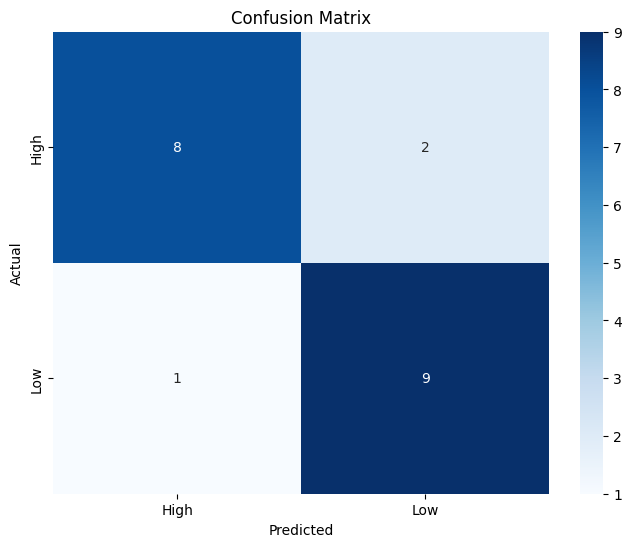

In [500]:


## 5. Apply Naive Bayes Classification



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [501]:
import joblib

# Save the model
joblib.dump(gnb, r'pickles\naive_bayes_model.pkl')

# Save the encoders
joblib.dump(label_encoders, r'pickles\label_encoders.pkl')
joblib.dump(target_encoder, r'pickles\target_encoder.pkl')


['pickles\\target_encoder.pkl']

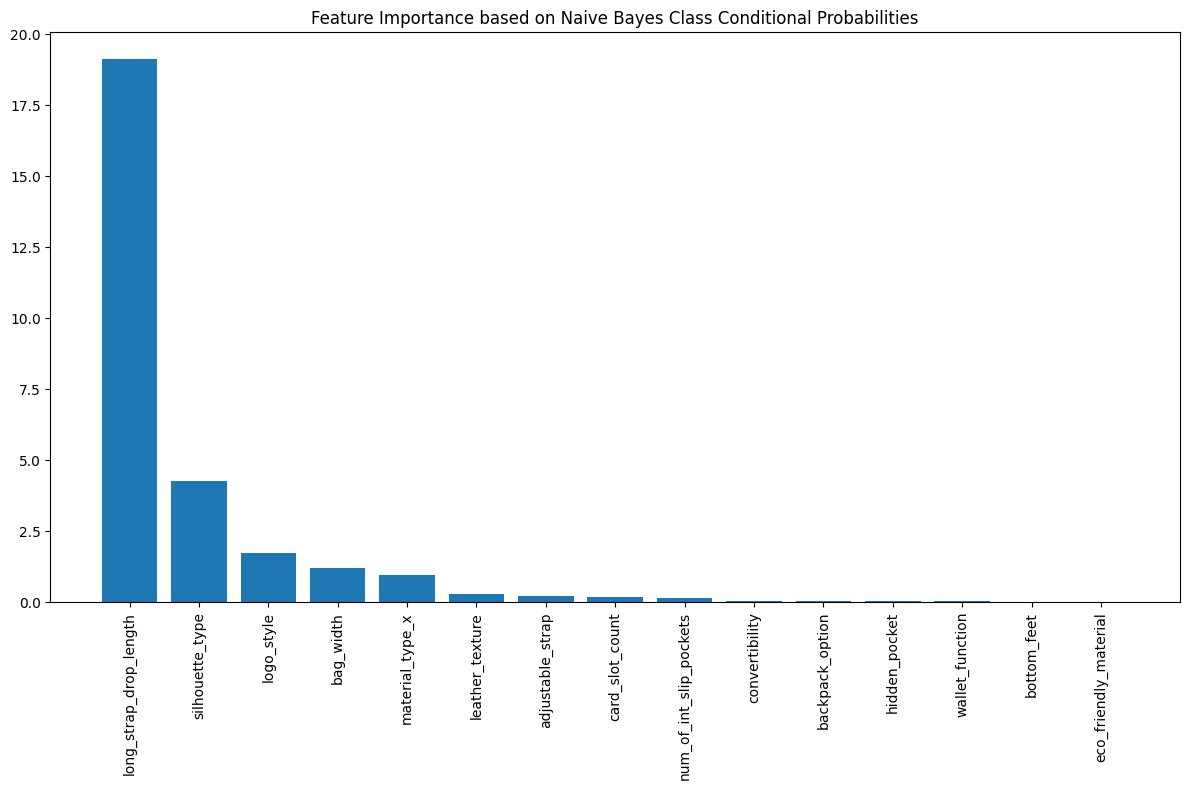

Top 10 most important features:
1. long_strap_drop_length: 19.1045
2. silhouette_type: 4.2727
3. logo_style: 1.7273
4. bag_width: 1.1864
5. material_type_x: 0.9545
6. leather_texture: 0.2727
7. adjustable_strap: 0.2273
8. card_slot_count: 0.1818
9. num_of_int_slip_pockets: 0.1364
10. convertibility: 0.0455


In [502]:
## 6. Feature Importance Analysis



# Calculate feature importance as the difference in class conditional probabilities
feature_importance = {}
for i, feature in enumerate(selected_feature_names):
    feature_importance[feature] = np.max(gnb.theta_[:, i]) - np.min(gnb.theta_[:, i])

# Sort features by importance
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance.keys(), feature_importance.values())
plt.xticks(rotation=90)
plt.title('Feature Importance based on Naive Bayes Class Conditional Probabilities')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("Top 10 most important features:")
for i, (feature, importance) in enumerate(list(feature_importance.items())[:10]):
    print(f"{i+1}. {feature}: {importance:.4f}")


In [117]:
df_original["subcollection"].value_counts()

subcollection
RFB    26
CRI    15
SVC    10
DFR     8
LHW     6
SMA     6
SZL     3
CQS     3
LUE     2
SJD     2
PWE     2
DEO     2
CNS     1
SAJ     1
OAC     1
ARP     1
MUC     1
DIA     1
SBK     1
nan     1
MUH     1
OLI     1
Name: count, dtype: int64

In [169]:
# !pip install flask

  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)


In [503]:

## 7. Probabilistic Analysis of Feature Combinations


import pandas.api.types as ptypes

# Select top 5 most important features
top_features = list(feature_importance.keys())[:10]

# Create a dataframe with original values for better interpretability
df_original = df.copy()
df_original["sales_category"] = df_selected['sales_category']
for feature in top_features:
    if feature in categorical_features:
        # Map back to original categories for categorical features
        df_original[feature + '_encoded'] = df_selected[feature]

# Calculate conditional probabilities for each feature given the sales category
print("Conditional Probabilities for Top Features:")
for feature in top_features:
    if feature in df_original.columns:
        if ptypes.is_numeric_dtype(df[feature]):
        # For numerical features
            print(f"\n{feature}:")
            for category in df_original['sales_category'].unique():
                mean_val = df_original[df_original['sales_category'] == category][feature].mean()
                std_val = df_original[df_original['sales_category'] == category][feature].std()
                print(f"  {category}: Mean = {mean_val:.2f}, Std = {std_val:.2f}")
        else:
                # continue
            # For encoded categorical features
            print(f"\n{feature}:")
            for category in df_original['sales_category'].unique():
                value_counts = df_original[df_original['sales_category'] == category][feature + '_encoded'].value_counts(normalize=True)
                print(f"  {category}:")
                for val, prob in value_counts.items():
                    original_val = label_encoders[feature].inverse_transform([val])[0]
                    print(f"    {original_val}: {prob:.2f}")

Conditional Probabilities for Top Features:

long_strap_drop_length:
  0: Mean = 44.23, Std = 30.78
  1: Mean = 30.49, Std = 30.16

silhouette_type:
  0:
    SHOULDER BAG: 0.12
    CROSSBODY: 0.12
    SATCHEL: 0.12
    WALLET: 0.12
    TOTE: 0.12
    BUCKET: 0.06
    FILE BAG: 0.03
    SADDLE: 0.03
    CAMERA BAG: 0.03
    WRISTLET: 0.03
    ENVELOPE WALLET CROSSBODY: 0.03
    MINI TERI: 0.03
    MESSENGER: 0.03
    POUCH WRISTLET: 0.03
    CARRYALL: 0.03
    HOBO: 0.03
  1:
    TOTE: 0.22
    CROSSBODY: 0.16
    SHOULDER BAG: 0.06
    HOBO: 0.06
    CAMERA BAG: 0.06
    SATCHEL: 0.06
    CARD CASE: 0.03
    WRISTLET: 0.03
    FILE BAG: 0.03
    MINI FILE BAG: 0.03
    BARREL: 0.03
    CONVERTIBLE MINI BACKPACK: 0.03
    BACKPACK: 0.03
    BUCKET: 0.03
    HEART CROSSBODY: 0.03
    BELT BAG: 0.03
    NAN: 0.03
    DOUBLE CORNER ZIP: 0.03

logo_style:
  0:
    HORSE CARRIAGE: 0.25
    BLIND EMBOSS: 0.16
    COACH: 0.16
    C: 0.12
    NAN: 0.12
    EMBOSSED: 0.06
    COACH TEXT: 0.03
  

In [504]:
top_features

['long_strap_drop_length',
 'silhouette_type',
 'logo_style',
 'bag_width',
 'material_type_x',
 'leather_texture',
 'adjustable_strap',
 'card_slot_count',
 'num_of_int_slip_pockets',
 'convertibility']

In [154]:

# ## 8. Analyze Feature Combinations



# # Create combinations of top features
# df_combo = df_selected[top_features + ['sales_category']].copy()

# # Map sales category back to original labels
# df_combo['sales_category'] = target_encoder.inverse_transform(df_combo['sales_category'])

# # Create feature combinations
# df_combo['width_pockets'] = df_combo['bag_width'] * df_combo['total_pocket_count']
# df_combo['width_wristlet'] = df_combo['bag_width'] * df_combo['wristlet_option']

# # Analyze combinations
# print("Feature Combination Analysis:")
# for combo in ['width_pockets', 'width_wristlet']:
#     print(f"\n{combo} by Sales Category:")
#     for category in df_combo['sales_category'].unique():
#         mean_val = df_combo[df_combo['sales_category'] == category][combo].mean()
#         print(f"  {category}: Mean = {mean_val:.2f}")

# # Visualize feature combinations
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.boxplot(x='sales_category', y='width_pockets', data=df_combo)
# plt.title('Bag Width * Total Pocket Count by Sales Category')
# plt.xticks(rotation=45)

# plt.subplot(1, 2, 2)
# sns.boxplot(x='sales_category', y='width_wristlet', data=df_combo)
# plt.title('Bag Width * Wristlet Option by Sales Category')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

 # DoWHY

In [505]:
# import pandas as pd
# import dowhy
# from dowhy import CausalModel
# from dowhy.datasets import linear_dataset
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# data = df 

# # Select features of interest
# features_of_interest = [
#     'bag_height', 'bag_width', 'gusset_width', 'material_type_x',
#     'hardware_color', 'num_of_compartments', 'closure_type',
#     'num_of_int_pockets', 'num_of_ext_pockets', 'total_pocket_count'
# ]

# # Treatment and outcome variables
# treatment_variable = 'bag_height'  # Example treatment variable
# outcome_variable = 'net_sales_amt_lcl_sum'  # Example outcome variable

# # Convert categorical variables to numerical if necessary
# for feature in features_of_interest:
#     if data[feature].dtype == 'object':
#         data[feature] = pd.factorize(data[feature])[0]

# # Define the causal model
# model = CausalModel(
#     data=data,
#     treatment=treatment_variable,
#     outcome=outcome_variable,
#     common_causes=features_of_interest
# )

# # View assumptions
# model.view_model(layout="dot")
# from IPython.display import Image, display
# display(Image(filename="causal_model.png"))


In [506]:
# !pip install pygraphviz

In [507]:

# # Identify the causal effect
# identified_estimand = model.identify_effect()
# print(identified_estimand)

# # Estimate the causal effect
# causal_estimate = model.estimate_effect(
#     identified_estimand,
#     method_name="backdoor.linear_regression",
#     control_value=0,
#     treatment_value=1
# )

# # Print estimation summary
# print(causal_estimate)

# # Check assumptions
# res_random = model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
# print(res_random)

# res_placebo = model.refute_estimate(identified_estimand, causal_estimate, method_name="placebo_treatment_refuter")
# print(res_placebo)

# res_subset = model.refute_estimate(identified_estimand, causal_estimate, method_name="data_subset_refuter")
# print(res_subset)

# # Visualization
# sns.scatterplot(data=data, x=treatment_variable, y=outcome_variable)
# plt.title("Relation between Treatment and Outcome")
# plt.show()